# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

With a Car's dataset given, the business goal is to understand the attributes that impact sales price of used cars and be able to predict the car prices. From the data standpoint, The objective is 
  1. Identity the top features that influence the car price
  2. Build a predictive model with those features.
We will use various data cleansing and machine learning techniques to identify the same.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [202]:
# Core Libraries
import pandas as pd
import numpy as np

# Plot libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)

In [203]:
# Let's load the data
df = pd.read_csv('data/vehicles.csv')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [205]:
df.sample(10).head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
238886,7312247032,hickory / lenoir,18969,2017.0,lincoln,mkx,NaN,6 cylinders,gas,111465.0,clean,automatic,NaN,4wd,mid-size,SUV,silver,nc
239952,7305261014,jacksonville,18999,2017.0,nissan,altima 2.5 svsedan,excellent,4 cylinders,gas,23217.0,NaN,automatic,1N4AL3AP9HC255190,NaN,NaN,sedan,NaN,nc
178636,7313934952,maine,5995,2013.0,volkswagen,passat,like new,NaN,gas,187.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,me
84662,7310976432,hartford,8495,2012.0,mini,countryman,NaN,NaN,gas,107612.0,clean,automatic,WMWZC5C57CWL57466,NaN,compact,other,custom,ct
74104,7310494038,colorado springs,41999,2018.0,dodge,durango,NaN,8 cylinders,gas,45519.0,clean,automatic,NaN,4wd,mid-size,SUV,black,co


In [206]:
# Check for missing values

missing_values = (df.isna().mean() * 100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})
missing_values["Missing %"] = round(missing_values["Missing %"])

missing_values

,Features,Missing %
0,id,0.0
1,region,0.0
2,price,0.0
3,year,0.0
4,manufacturer,4.0
5,model,1.0
6,condition,41.0
7,cylinders,42.0
8,fuel,1.0
9,odometer,1.0


In [207]:
# Looking at the sample above, there are columns with nulls.. Check for nulls and remove nulls.
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


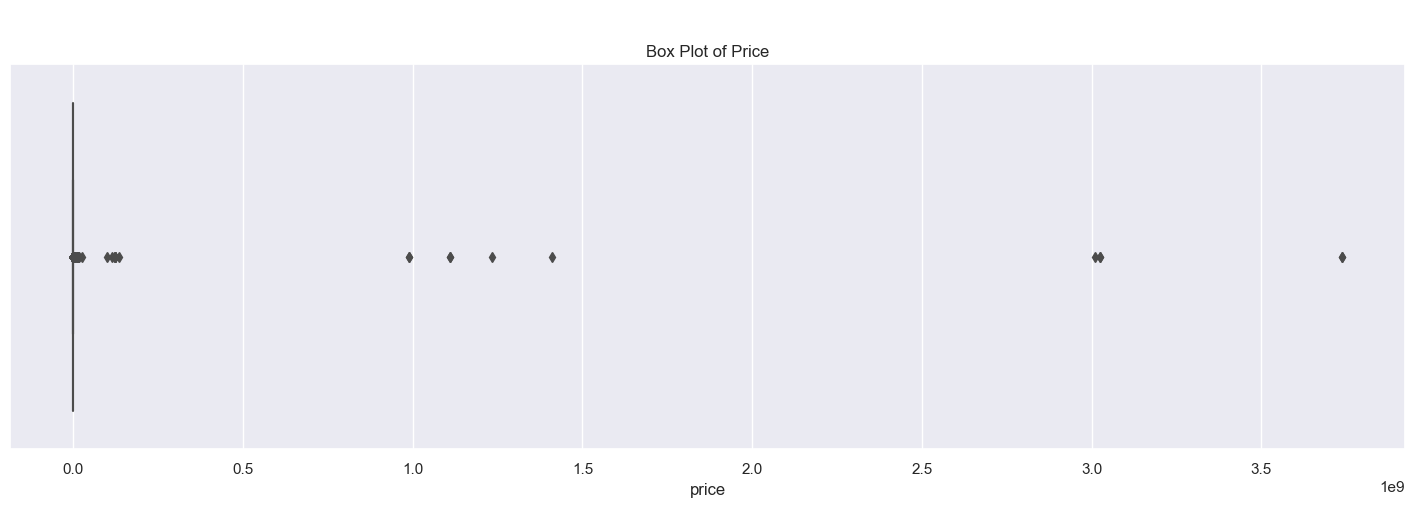

In [208]:
# Check for outliers in numeric columns
sns.boxplot(x=df["price"]);
plt.title("\n\nBox Plot of Price");
df.describe()[["price"]]

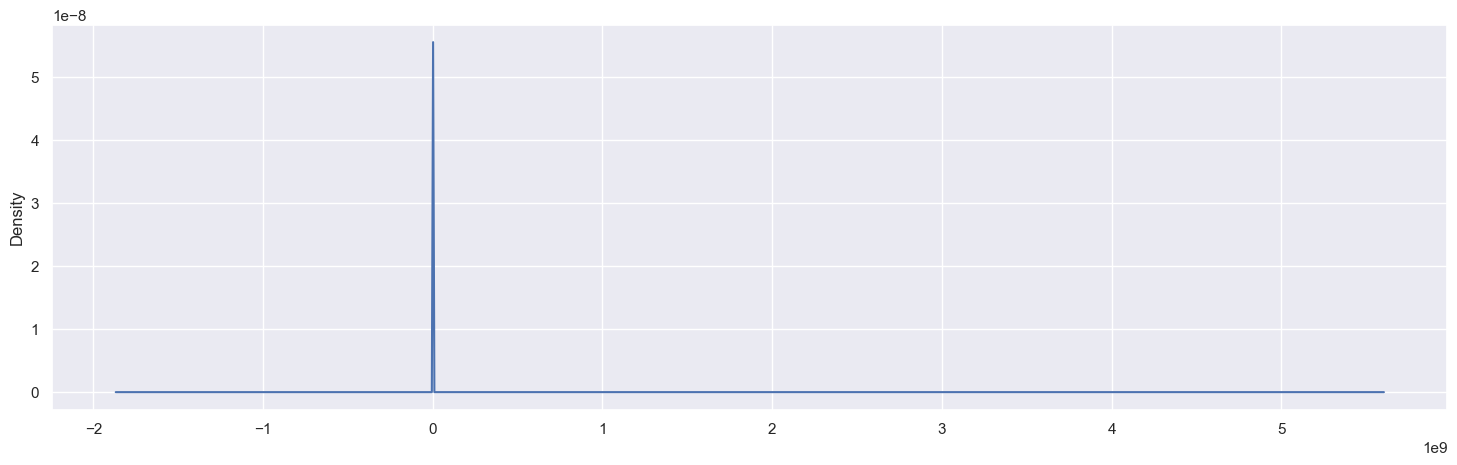

In [209]:
 df["price"].plot(kind="kde");

In [ ]:
# Let's look at avg price by each category columns:

category_columns = ["region","year", "model",  "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
fig, axs = plt.subplots(7, 2, figsize=(18, 15));

row=0
col=0
for index, column in enumerate(category_columns):
    axis = axs[row, col]
    sns.barplot(x=column, y='price', data=df, ax=axis);
    axis.set_title(f'Avg. Price by {category_columns[index]}!')
    col = col+1
    if(col>1): 
        row=row+1
        col=0
fig.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [174]:
# Set Id as index
df = pd.read_csv('data/vehicles.csv').dropna()
df.set_index("id", inplace=True)

In [175]:
# Convert cylinders to numeric
df['cylinders'].value_counts()
df['cylinders'] = df['cylinders'].str.replace("cylinders","").str.replace("other", "0").str.strip().astype(int)
df['cylinders'].value_counts()

cylinders
6     11618
4     11302
8     10928
10      565
5       281
0        96
3        67
12       11
Name: count, dtype: int64

In [176]:
# Check transmission
df.transmission.value_counts()

transmission
automatic    32476
manual        1693
other          699
Name: count, dtype: int64

In [177]:
# Convert Electric cars cylinders to 0
df.loc[df["fuel"] == "electric", "cylinders"] = df.loc[df["fuel"] == "electric", "cylinders"].fillna("0")

# Also convery cylinders to int
df["cylinders"] = df["cylinders"].astype("int")

In [178]:
# Since we have id, we can remove VIN
df = df.drop(columns=['VIN'])

In [179]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [180]:
imputer = SimpleImputer(strategy='most_frequent')

df_imputed_cat = pd.DataFrame(imputer.fit_transform(df.select_dtypes("object")), columns=df.select_dtypes("object").columns)

df_imputed_cat.head()

,region,manufacturer,model,condition,fuel,title_status,transmission,drive,size,type,paint_color,state
0,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al
1,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al
2,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al
3,birmingham,toyota,echo,excellent,gas,clean,automatic,fwd,compact,sedan,blue,al
4,birmingham,bmw,525i,fair,gas,clean,automatic,rwd,mid-size,sedan,white,al


In [182]:
imputer = KNNImputer(n_neighbors=2)

df_imputed_num = pd.DataFrame(imputer.fit_transform(df.select_dtypes(["int", "float"])), columns=df.select_dtypes(["int", "float"]).columns)
df_imputed_num

,price,year,cylinders,odometer
0,0.0,2018.0,6.0,68472.0
1,0.0,2019.0,6.0,69125.0
2,0.0,2018.0,6.0,66555.0
3,4000.0,2002.0,4.0,155000.0
4,2500.0,1995.0,6.0,110661.0
...,...,...,...,...
30227,23995.0,2013.0,8.0,114215.0
30228,15999.0,2000.0,6.0,199090.0
30229,24995.0,2014.0,8.0,128722.0
30230,6800.0,1997.0,8.0,69550.0


In [183]:
df_imputed = pd.concat([df_imputed_cat, df_imputed_num], axis=1)
df_imputed.head()

,region,manufacturer,model,condition,fuel,title_status,transmission,drive,size,type,paint_color,state,price,year,cylinders,odometer
0,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al,0.0,2018.0,6.0,68472.0
1,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al,0.0,2019.0,6.0,69125.0
2,auburn,chevrolet,express cargo van,like new,gas,clean,automatic,rwd,full-size,van,white,al,0.0,2018.0,6.0,66555.0
3,birmingham,toyota,echo,excellent,gas,clean,automatic,fwd,compact,sedan,blue,al,4000.0,2002.0,4.0,155000.0
4,birmingham,bmw,525i,fair,gas,clean,automatic,rwd,mid-size,sedan,white,al,2500.0,1995.0,6.0,110661.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [184]:
# Region/state don't seem to impact the price... removing them.
df_imputed= df_imputed.drop(columns=['region', 'state', 'model', 'paint_color'])

In [185]:
df_imputed.dtypes

manufacturer     object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
size             object
type             object
price           float64
year            float64
cylinders       float64
odometer        float64
dtype: object

In [168]:
# Create column transformers
category_columns = ['manufacturer',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type', 
 'condition',
 'size']

col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(), category_columns),
    ("poly", PolynomialFeatures(degree=3, include_bias=False), ["cylinders", "odometer", "year"])
])


In [200]:
# Create Test & Train Data
X = df_imputed.drop(columns="price")
y = df_imputed["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [201]:
# Model 1: Linear Regression with 92 features

train_mse = []
test_mse = []
explained_variance = []
model =[]

linear_reg_model = Pipeline([
    ('transform', col_transformer),
    ('scale', StandardScaler(with_mean=False)),
    ('linreg', LinearRegression())
])

linear_reg_model.fit(X_train, y_train)

linear_reg_train_mse= round(mean_squared_error(linear_reg_model.predict(X_train), y_train), 4)
linear_reg_test_mse=round(mean_squared_error(linear_reg_model.predict(X_test), y_test),4)
linear_reg_EV = explained_variance_score(y_train, linear_reg_model.predict(X_train))

train_mse.append(linear_reg_train_mse)
test_mse.append(linear_reg_test_mse)
explained_variance.append(linear_reg_EV)
model.append("Model 1 - Linear Regression")

/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/dp/rbxn103d22s51s7mg1hyjn5m0000gp/T/ipykernel_88088/2577517281.py:3: RuntimeWarning: overflow encountered in exp
  plt.scatter(X_train['year'], np.exp(linear_reg_model.predict(X_train)), c ="orange", alpha=0.3, label = 'predicted value')


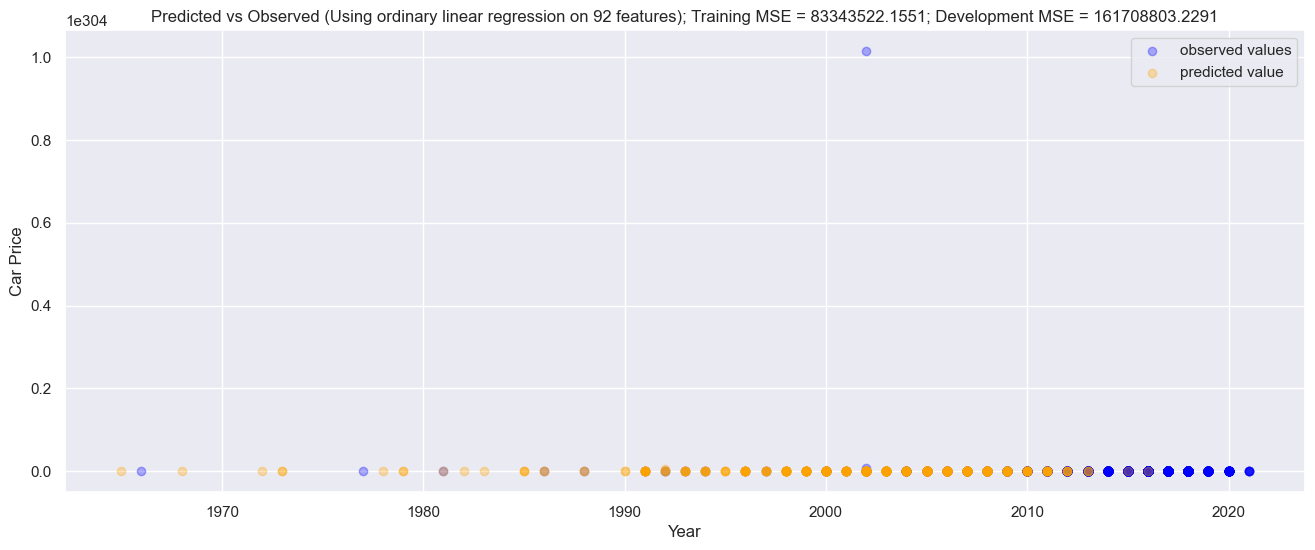

In [196]:
plt.figure(figsize=(16,6))
plt.scatter(X_train['year'], np.exp(y_train), c ="blue", alpha=0.3, label='observed values')
plt.scatter(X_train['year'], np.exp(linear_reg_model.predict(X_train)), c ="orange", alpha=0.3, label = 'predicted value')
plt.title('Predicted vs Observed (Using ordinary linear regression on 92 features); Training MSE = ' + str(linear_reg_train_mse) +
          '; Development MSE = ' + str(linear_reg_test_mse))
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.legend()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.